In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score


In [19]:
df = pd.read_csv('Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [20]:

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [22]:
classifier = [["KNN",KNeighborsClassifier()],["RF",RandomForestClassifier(random_state=0,criterion="entropy",n_estimators=50)],["SVC",SVC(random_state=0)],["naive bayes",GaussianNB()],["LR",LogisticRegression(multi_class='ovr',random_state=0)]]
ans = []

In [23]:
for i in range(len(classifier)):
    temp=[]
    for j in range(50,100,10):
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)        
        scaler= StandardScaler().fit(X_train)
        X_scaled=scaler.transform(X_train)
        classifier[i][1].fit(X_scaled,y_train)
        X_test_sc=scaler.transform(X_test)
        y_pred = classifier[i][1].predict(X_test_sc)
        cm=confusion_matrix(y_test,y_pred)
        acc = accuracy_score(y_test,y_pred)
        temp.append(acc)
    ans.append(temp)
    

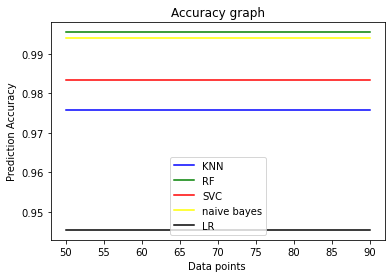

In [24]:
colour = ['blue','green','red','yellow','black']

accur = np.arange(50,100,10)

for i in range(5):
    plt.plot(accur,ans[i],color=colour[i],label=classifier[i][0])
    
plt.title("Accuracy graph")
plt.xlabel("Data points ")
plt.ylabel("Prediction Accuracy")
plt.legend()